In [1]:
import time

import numpy as np
import fft_project

In [2]:

def random_matrix(n, m):
    result = np.zeros((n, m), dtype=np.complex128)
    result.real = np.random.rand(n, m)
    return result


In [3]:
import time
mx_power = 13

def mesure_no_ret_copy(times):
    for dim1 in range(mx_power - 2, mx_power + 1):
        for dim2 in range(dim1 - 2, dim1 + 1):
            mn = 100.0
            for _ in range(5):
                n = 2 ** dim1
                m = 2 ** dim2
                a = random_matrix(n, m)
                st_time = time.time()
                fft_project.fft.fft2d(a, return_copy=False, use_threads=False)
                delta_time = time.time() - st_time
                del a
                mn = min(mn, delta_time)
            print(f'No copy: {n}x{m} {mn}')
            times.append(((n, m), mn))

def measure_numpy(times):
    for dim1 in range(mx_power - 2, mx_power + 1):
        for dim2 in range(dim1 - 2, dim1 + 1):
            mn = 100.0
            for _ in range(5):
                n = 2 ** dim1
                m = 2 ** dim2
                a = random_matrix(n, m)
                st_time = time.time()
                np.fft.fft2(a)
                delta_time = time.time() - st_time
                del a
                mn = min(mn, delta_time)
            print(f'Numpy: {n}x{m} {mn}')
            times.append(((n, m), mn))

def with_copy(times):
    for dim1 in range(mx_power - 2, mx_power + 1):
        for dim2 in range(dim1 - 2, dim1 + 1):
            mn = 100.0
            for _ in range(5):
                n = 2 ** dim1
                m = 2 ** dim2
                a = random_matrix(n, m)
                st_time = time.time()
                fft_project.fft.fft2d(a, return_copy=True, use_threads=False)
                delta_time = time.time() - st_time
                del a
                mn = min(mn, delta_time)
            print(f'With copy: {n}x{m} {mn}')
            times.append(((n, m), mn))

def multithreaded(times):
    for dim1 in range(mx_power - 2, mx_power + 1):
        for dim2 in range(dim1 - 2, dim1 + 1):
            mn = 100.0
            for _ in range(5):
                n = 2 ** dim1
                m = 2 ** dim2
                a = random_matrix(n, m)
                st_time = time.time()
                fft_project.fft.fft2d(a, return_copy=False, use_threads=True)
                delta_time = time.time() - st_time
                del a
                mn = min(mn, delta_time)
            print(f'Multithreaded: {n}x{m} {mn}')
            times.append(((n, m), mn))



In [5]:
no_return_copy = []
numpy_times = []
with_copy_times = []
multithreaded_times = []

mesure_no_ret_copy(no_return_copy)
with_copy(with_copy_times)
multithreaded(multithreaded_times)
measure_numpy(numpy_times)

No copy: 2048x512 0.009017229080200195
No copy: 2048x1024 0.018663883209228516
No copy: 2048x2048 0.04017519950866699
No copy: 4096x1024 0.03968000411987305
No copy: 4096x2048 0.08100199699401855
No copy: 4096x4096 0.1730668544769287
No copy: 8192x2048 0.17284083366394043
No copy: 8192x4096 0.34935617446899414
No copy: 8192x8192 0.8273310661315918
With copy: 2048x512 0.009310007095336914
With copy: 2048x1024 0.02176809310913086
With copy: 2048x2048 0.04576992988586426
With copy: 4096x1024 0.04550290107727051
With copy: 4096x2048 0.09580230712890625
With copy: 4096x4096 0.19709396362304688
With copy: 8192x2048 0.20107316970825195
With copy: 8192x4096 0.4109461307525635
With copy: 8192x8192 0.9414398670196533
Multithreaded: 2048x512 0.0044291019439697266
Multithreaded: 2048x1024 0.006844043731689453
Multithreaded: 2048x2048 0.01277303695678711
Multithreaded: 4096x1024 0.017312049865722656
Multithreaded: 4096x2048 0.029938936233520508
Multithreaded: 4096x4096 0.05394482612609863
Multithre

In [7]:
def by_matrix_size(x):
    return x[0][0] * x[0][1]

sorted_no_return_copy = sorted(no_return_copy, key=by_matrix_size)
sorted_numpy_times = sorted(numpy_times, key=by_matrix_size)
sorted_multithreaded_times = sorted(multithreaded_times, key=by_matrix_size)
sorted_with_copy_times = sorted(with_copy_times, key=by_matrix_size)

print (sorted_no_return_copy)
print (sorted_numpy_times)

[((2048, 512), 0.009217977523803711), ((2048, 1024), 0.01931905746459961), ((2048, 2048), 0.039028167724609375), ((4096, 1024), 0.03999590873718262), ((4096, 2048), 0.0794839859008789), ((4096, 4096), 0.16448307037353516), ((8192, 2048), 0.1697549819946289), ((8192, 4096), 0.35146307945251465), ((8192, 8192), 0.8214659690856934)]
[((2048, 512), 0.011386871337890625), ((2048, 1024), 0.0297088623046875), ((2048, 2048), 0.061171770095825195), ((4096, 1024), 0.06546497344970703), ((4096, 2048), 0.13332700729370117), ((4096, 4096), 0.2661619186401367), ((8192, 2048), 0.2840132713317871), ((8192, 4096), 0.5694582462310791), ((8192, 8192), 1.3671867847442627)]


In [ ]:
!pip3 install matplotlib

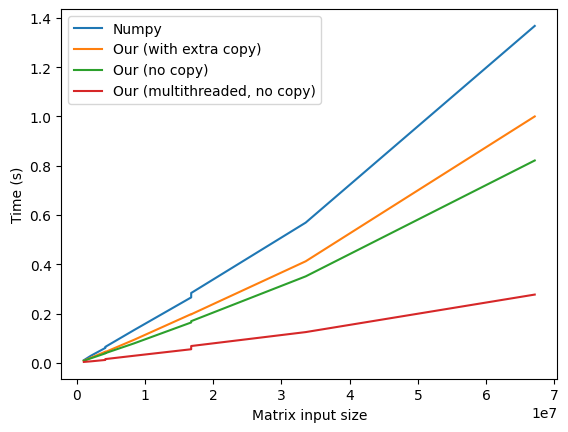

In [8]:
import matplotlib.pyplot as plt

no_copy_inp_size    = list(x[0][0] * x[0][1] for x in sorted_no_return_copy     ) # [0:90]
no_copy_time        = list(x[1]              for x in sorted_no_return_copy     ) # [0:90]
np_time             = list(x[1]              for x in sorted_numpy_times        ) # [0:90]
multithreaded_time  = list(x[1]              for x in sorted_multithreaded_times) # [0:90]
with_copy_time      = list(x[1]              for x in sorted_with_copy_times    ) # [0:90]

plt.plot(no_copy_inp_size, np_time, label='Numpy')
plt.plot(no_copy_inp_size, with_copy_time, label='Our (with extra copy)')
plt.plot(no_copy_inp_size, no_copy_time, label='Our (no copy)')
plt.plot(no_copy_inp_size, multithreaded_time, label='Our (multithreaded, no copy)')

plt.xlabel('Matrix input size')
plt.ylabel('Time (s)')

plt.legend()
plt.show()